┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273


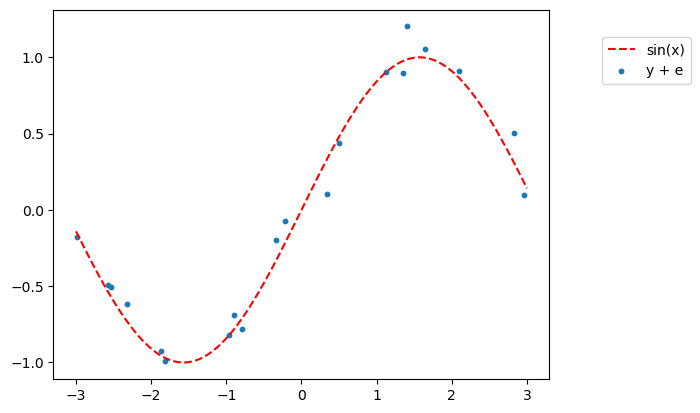

PyObject <matplotlib.legend.Legend object at 0x7fa4caa6caf0>

In [2]:
using PyPlot
using Revise
using Distributions

n = 20       # pocet bodu
s = 0.08     # rozptyl chyby

a = -3.0     # rozsah x
b = 3.0

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)     #  e ~ N(0, s)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


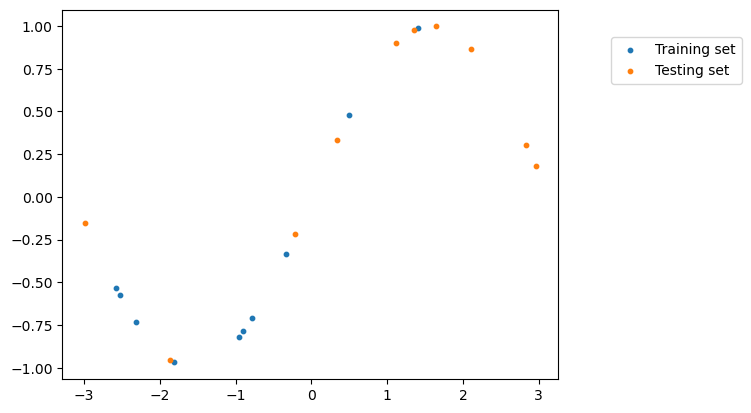

PyObject <matplotlib.legend.Legend object at 0x7fa505490dc0>

In [3]:
# rozdeleni na trenovaci data (fituji se) a testovaci data

ind = collect(1:n)

ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [4]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sqrt(sum(dif.*dif))
end

function grad_descend(x, w0, d, step)
    i = 0
    g_norm = 1.0    
    while (i<3.0e7 && g_norm > 0.05)
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 1.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end


grad_descend (generic function with 1 method)

iter = 1000000
  w = [-0.005399197037441554, 0.1433305552003475]
  loss = 2.373589216308647
g norm = 10.187190207888026

iter = 2000000
  w = [-0.006094238623038314, 0.21787347751066252]
  loss = 2.1171455173992832
g norm = 5.262519735509706

iter = 3000000
  w = [-0.005161523316884539, 0.2564047056352813]
  loss = 2.0431602009067436
g norm = 2.7251812686224315

iter = 4000000
  w = [-0.0036211872206292467, 0.27634752582801303]
  loss = 2.022779625890816
g norm = 1.419816552108076

iter = 5000000
  w = [-0.001957717153425214, 0.28669075099719316]
  loss = 2.017158316944486
g norm = 0.7506154998754082

iter = 6000000
  w = [-0.00038681905060431403, 0.2920726241462966]
  loss = 2.015548967313355
g norm = 0.4100974968555939

iter = 7000000
  w = [0.00100828822716201, 0.29488717761192457]
  loss = 2.0150456314856195
g norm = 0.23887168485872692

iter = 8000000
  w = [0.002207681562657057, 0.2963706594017705]
  loss = 2.0148612151644327
g norm = 0.15320800282966057

iter = 9000000
  w = [0.

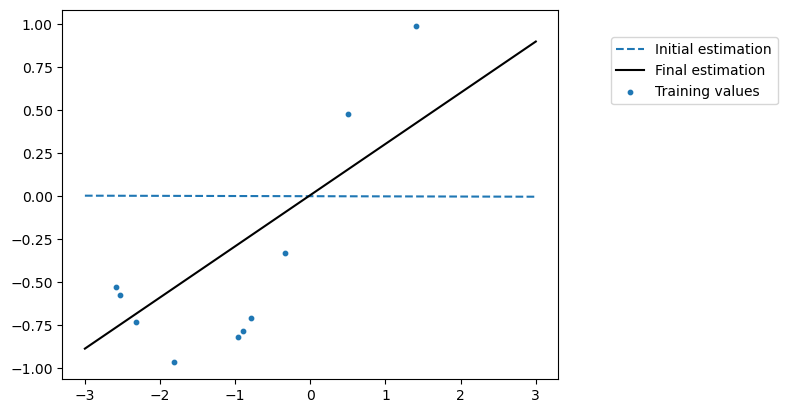

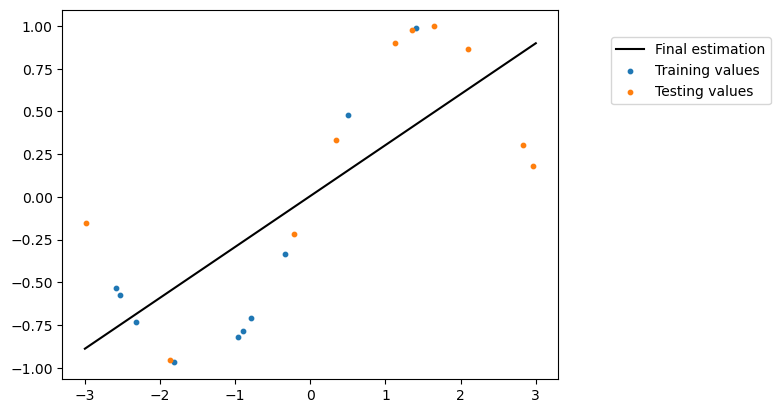

w final = [0.005513084411357213, 0.2980004145674097]


PyObject <matplotlib.legend.Legend object at 0x7fa5053be970>

In [5]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 2
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x, w_init, d, 1.0e-8)
println("w final = ", w_final)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


iter = 1000000
  w = [-0.02433489112642205, 0.3023380985014585, 0.06629130163285803, 0.1215245251468454, -0.0071131408210529925, -0.017684822913795722]
  loss = 1.20778674206033
g norm = 2.0356202628982736

iter = 2000000
  w = [-0.051957166380779594, 0.4629428490319828, 0.07264840575499405, 0.058085482535380706, -0.007668656716808561, -0.012373021464782719]
  loss = 0.916737872133762
g norm = 1.5017985938862235

iter = 3000000
  w = [-0.062495131724561157, 0.5836227239648346, 0.06938087079063658, 0.009832569984689345, -0.007232557791755949, -0.008317027846658777]
  loss = 0.705169740780822
g norm = 1.1304763217301268

iter = 4000000
  w = [-0.06309567464441646, 0.6751619509852358, 0.06239682853432408, -0.027060095251324686, -0.0064539629942329925, -0.005207929950135302]
  loss = 0.5477025456098379
g norm = 0.8640661691246572

iter = 5000000
  w = [-0.058633729865760285, 0.7451020582125827, 0.0540958228620678, -0.05543833850221155, -0.0055654162297587425, -0.0028111694464322094]
  loss

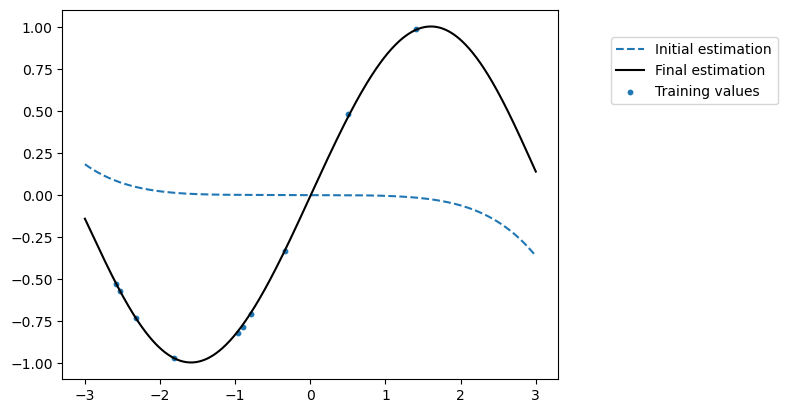

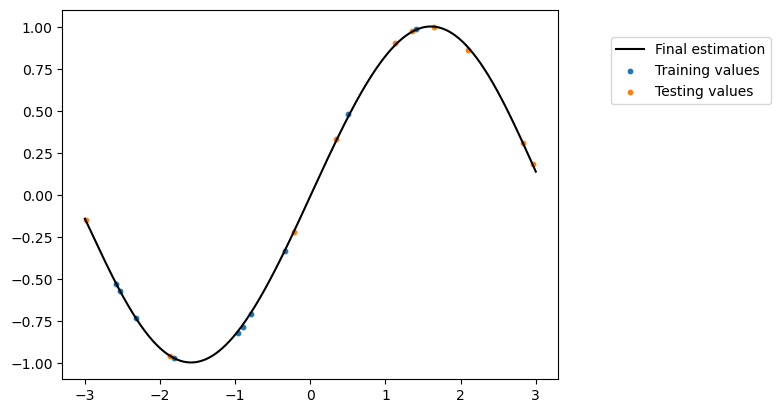

w final = [-0.0072686543645108705, 0.9722774253890548, 0.004927877366683627, -0.14904181729441313, -0.0004802568596140125, 0.0051331001840867075]


PyObject <matplotlib.legend.Legend object at 0x7fa4ca1d7f40>

In [6]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 6
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################


w_final = grad_descend(x, w_init, d, 1.0e-7)
println("w final = ", w_final)


fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")

plot(collect(a:0.01:b), P(w_init, collect(a:0.01:b) , d), "--", label = "Initial estimation")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



fig = figure()
scatter(x_train, y_train, s=10, label = "Training values")
scatter(x_test, y_test, s=10, label = "Testing values")
plot(collect(a:0.01:b), P(w_final, collect(a:0.01:b) , d), "k-", label = "Final estimation")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)
